<a href="https://colab.research.google.com/github/donlee4u/ML_Class/blob/main/5%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제0406

## 데이터 읽기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


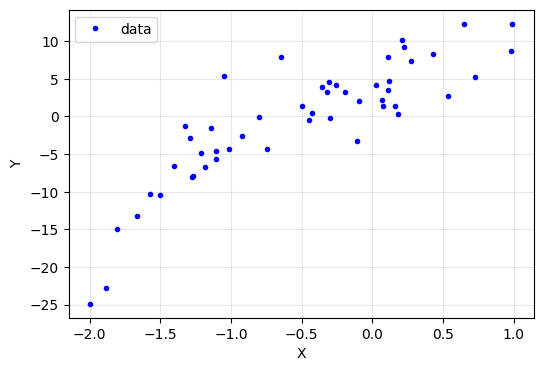

In [2]:
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data0405.csv', usecols=['x','y']).values

x = a[:,0]
x = x.reshape(50,-1)

y = a[:,1]
y = y.reshape(50,-1)

#y = np.array(x[:,1])
#y = np.array(x[:,1].reshape(-1, 1))
plt.figure(figsize = (6, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.legend()
plt.grid(alpha = 0.3)
#plt.show()

## 선형모델(최소제곱법)

omega:
 [[3.94188011]
 [8.73592461]]


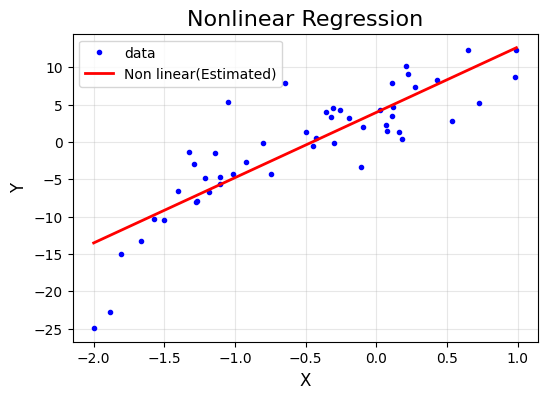

In [3]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
#yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2
yp = w[0,0] + w[1,0]*xp

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 비선형(2차) 모델

omega:
 [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


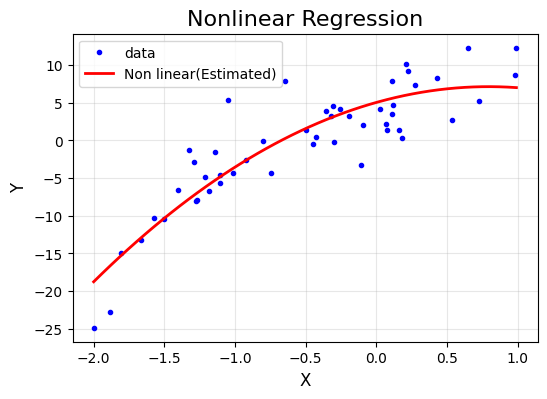

In [4]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 비선형(4차) 모델

omega:
 [[ 3.63261904]
 [ 5.43470387]
 [ 1.83955091]
 [ 0.76437773]
 [-1.20609535]]


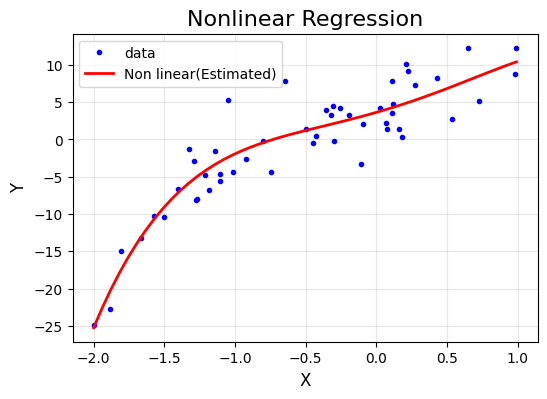

In [5]:
#A = np.hstack([x**0, x, x**2, x**3])
A = np.hstack([x**0, x, x**2, x**3, x**4])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
#yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2 + w[3,0]*xp**3 + w[4,0]*xp**4

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 선형모델(경사하강법)

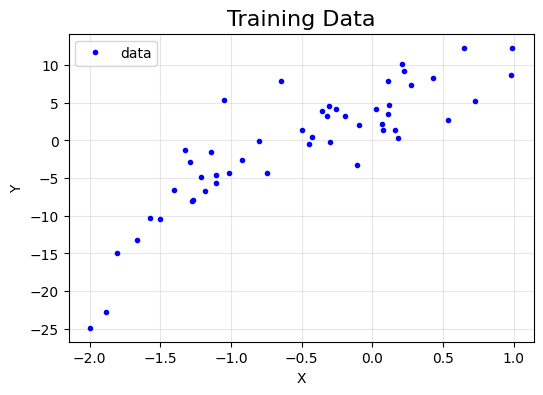

[7.87898157] [3.19955058]


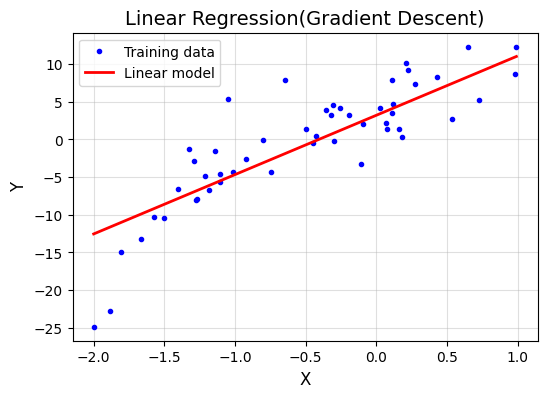

In [6]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data0405.csv', usecols=['x','y']).values

x = a[:,0]
x = x.reshape(50,-1)

y = a[:,1]
y = y.reshape(50,-1)

plt.figure(figsize = (6, 4))
plt.title('Training Data', fontsize = 16)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

#plt.show()

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 5000  # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(y_pred-y)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           		# 기울기 update
    w0 = w0 - lrate * dw0  		          # 절편 update
print (w1, w0)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 14)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', markersize = 3, label = "Training data")

xp = np.linspace(np.min(x), np.max(x))
y_pred = w1*xp + w0  # 예측값을 만든다.
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()